In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
ingresos = {
    'Id': range(1,21),
    'IngresosAnuales': [15, 16, 17, 18, 19, 20, 45, 46, 47, 50, 55, 60, 85, 86, 88, 89, 120, 125, 130, 135],
    'PuntajeCredito': [600, 580, 640, 670, 700, 720, 540, 550, 580, 590, 710, 740, 750, 770, 790, 810, 820, 830, 840, 850]
}

In [10]:
df = pd.DataFrame(ingresos)
df.head()

,Id,IngresosAnuales,PuntajeCredito
0,1,15,600
1,2,16,580
2,3,17,640
3,4,18,670
4,5,19,700


In [14]:
features = ['IngresosAnuales', 'PuntajeCredito']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


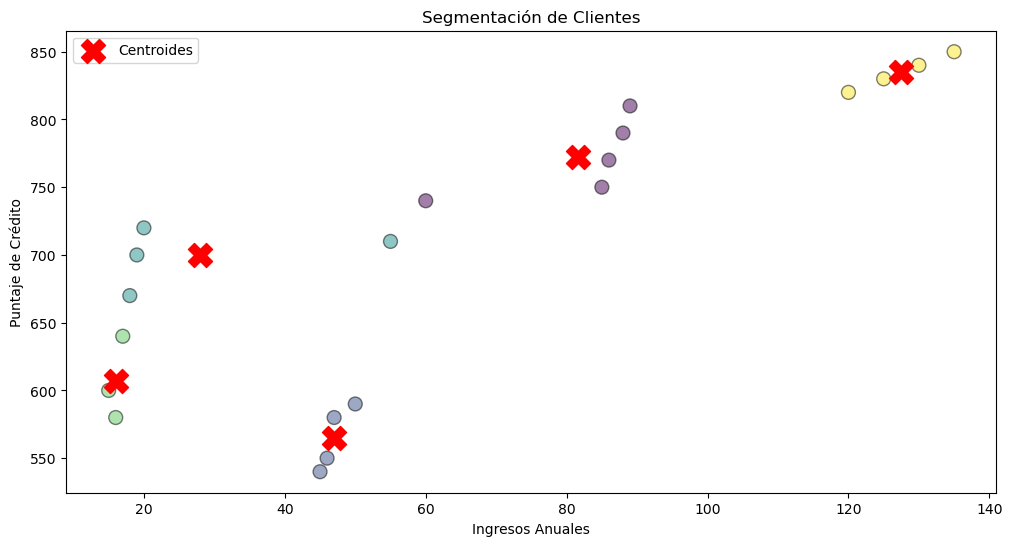

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(df['IngresosAnuales'], df['PuntajeCredito'], c=df['Cluster'], cmap='viridis', s=100,
            alpha=0.5, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
                kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
             s=300, c='red', label='Centroides', marker='X')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntaje de Crédito')
plt.title('Segmentación de Clientes')
plt.legend()
plt.show()